# importation des bibliothèque

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
path = r"C:\mes base de données\NLP DATA\fake and true data"

In [3]:
fake_path = path + '/'+ 'Fake.csv'
true_path = path + '/'+ 'True.csv'

# lecture des data set

In [4]:
fake_df = pd.read_csv(fake_path)
true_df = pd.read_csv(true_path)

In [5]:
fake_df.head() # data relative of fake informations

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


# Creation des label

In [8]:
fake_df['label'] = 0 # fake information 
true_df['label'] = 1 # true informations


In [9]:
dico = {'politicsNews':'politics', 'worldnews' : "News"}
true_df['subject'] = true_df["subject"].map(dico)


# regroupement des data sets

In [10]:
data_all = pd.concat([true_df ,fake_df])

In [11]:
data_all.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politics,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politics,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politics,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politics,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politics,"December 29, 2017",1


# Visualisations

In [12]:
label_count = data_all['label'].value_counts()
subject_count = data_all['subject'].value_counts()

In [13]:
subject_count

subject
News               19195
politics           18113
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

<BarContainer object of 6 artists>

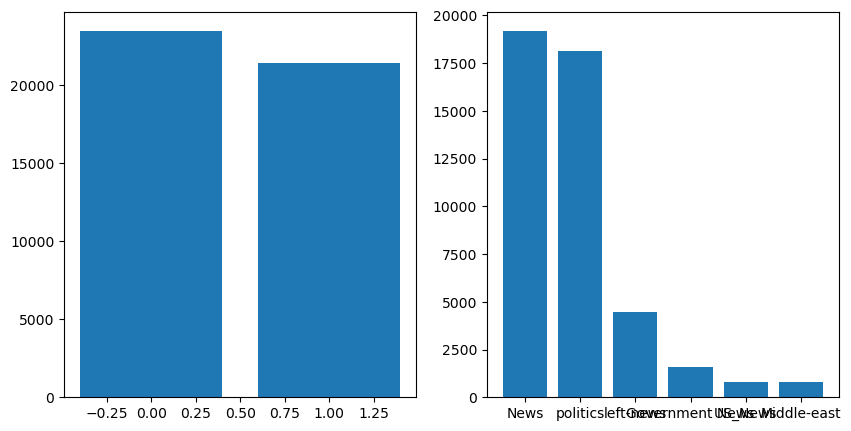

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.bar(x =label_count.index , height = label_count.values)
plt.subplot(122)
plt.bar(x =subject_count.index , height = subject_count.values)

# donnée sur les fake news

<BarContainer object of 6 artists>

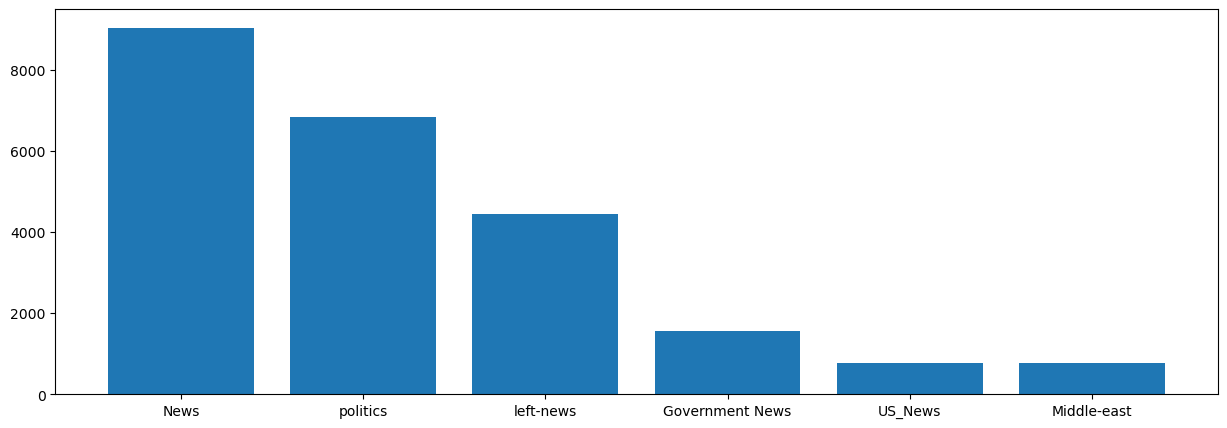

In [16]:
plt.figure(figsize=(15,5))
x = fake_df['subject'].value_counts()
plt.bar(x =x.index , height = x.values)

<BarContainer object of 2 artists>

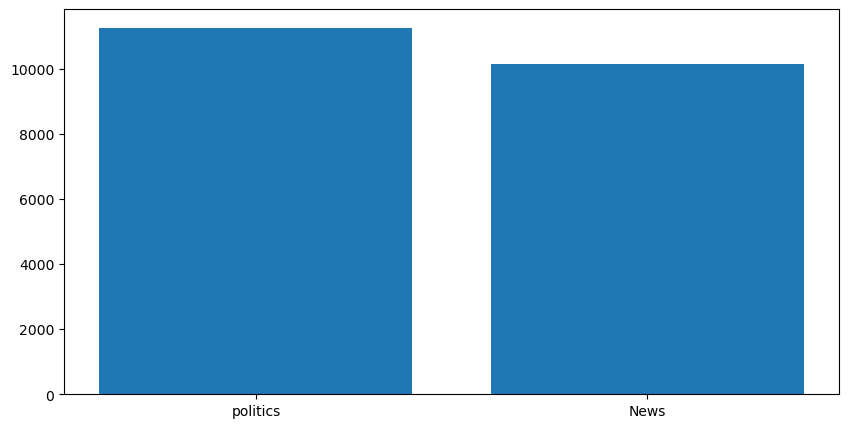

In [17]:
plt.figure(figsize=(10,5))
x = true_df['subject'].value_counts()
plt.bar(x =x.index , height = x.values)

In [21]:
data_all.shape

(44898, 5)

In [22]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [23]:
data_all_ = data_all.drop(columns = ["subject",'date'], axis = 1)

In [24]:
X = data_all_["text"]
y = data_all_['label']

In [108]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


# Features extractions

In [47]:
cv = CountVectorizer(analyzer == 'word')
X = cv.fit_transform(X)

In [81]:
def extract_label(features) : 
    good_feature_names = []
    for feat in features : 
        label_length = len(feat)
        label_set_length = len(set(feat))
        if label_length>6 and label_set_length>6 : 
            good_feature_names.append(feat)
    return good_feature_names
    
all_features = cv.get_feature_names_out()
features_to_keep = extract_label(all_features)

In [142]:
indices_to_keep = [i for i, feature in enumerate(all_features) if feature in features_to_keep]

# Filtrage de la matrice pour ne garder que les colonnes significatives
X_filtered = X[:, indices_to_keep]

# Vérification des noms de colonnes conservées
filtered_feature_names = all_features[indices_to_keep]

KeyboardInterrupt: 

# séparation en test et train set

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered,y, test_size = 0.2, random_state = 42)

In [92]:
print(f"la dimension des données d'entrainement sont : {X_train.shape}")
print(f"la dimension des données de test sont : {X_test.shape}")
print(f"la dimension des labels d'entrainement sont : {y_train.shape}")
print(f"la dimension des labels de test sont : {y_test.shape}")

la dimension des données d'entrainement sont : (35918, 61708)
la dimension des données de test sont : (8980, 61708)
la dimension des labels d'entrainement sont : (35918,)
la dimension des labels de test sont : (8980,)


In [94]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [96]:
y_pred = model.predict(X_test)

In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      4650
           1       0.96      0.97      0.96      4330

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



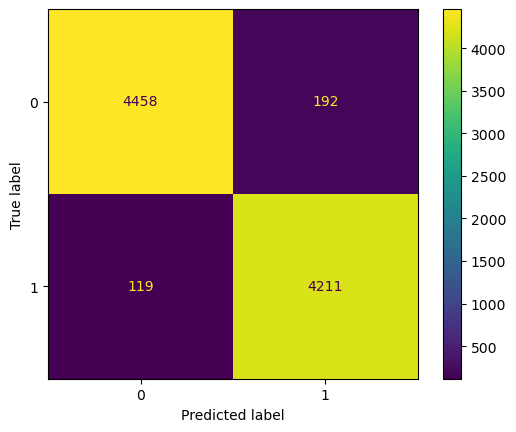

In [110]:
_ = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [102]:
model.score(X_test, y_test)

0.9653674832962138

In [125]:
model_2 = LogisticRegression()
model_2.fit(X_train, y_train)

LogisticRegression()

In [127]:
y_pred = model_2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      4650
           1       0.97      0.94      0.95      4330

    accuracy                           0.96      8980
   macro avg       0.96      0.95      0.96      8980
weighted avg       0.96      0.96      0.96      8980



In [131]:
model_2.score(X_test, y_test)

0.9551224944320713

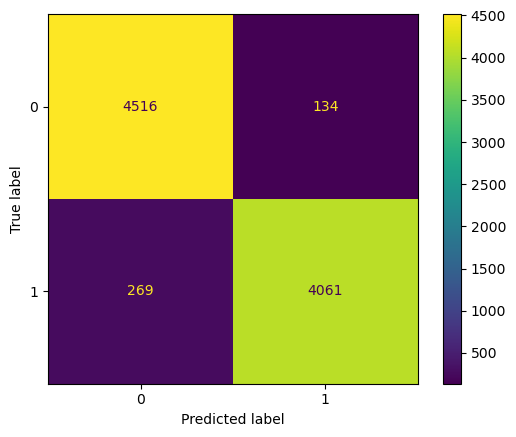

In [133]:
_ = ConfusionMatrixDisplay.from_estimator(model_2, X_test, y_test)